In [36]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\Sriya\\Downloads\\survey lung cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data = data.join(pd.get_dummies(data.GENDER)).drop('GENDER',axis=1)

In [14]:
data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,F,M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,1,0


In [15]:
data.groupby("LUNG_CANCER").mean()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,F,M
LUNG_CANCER,,,,,,,,,,,,,,,,
NO,60.743590,1.487179,1.333333,1.307692,1.256410,1.358974,1.487179,1.128205,1.230769,1.179487,1.256410,1.564103,1.128205,1.307692,0.564103,0.435897
YES,62.951852,1.574074,1.603704,1.525926,1.537037,1.525926,1.700000,1.618519,1.603704,1.611111,1.625926,1.651852,1.518519,1.592593,0.462963,0.537037


In [16]:
import seaborn as sns

C:\Users\Sriya\AppData\Local\Temp\ipykernel_20084\2599657872.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


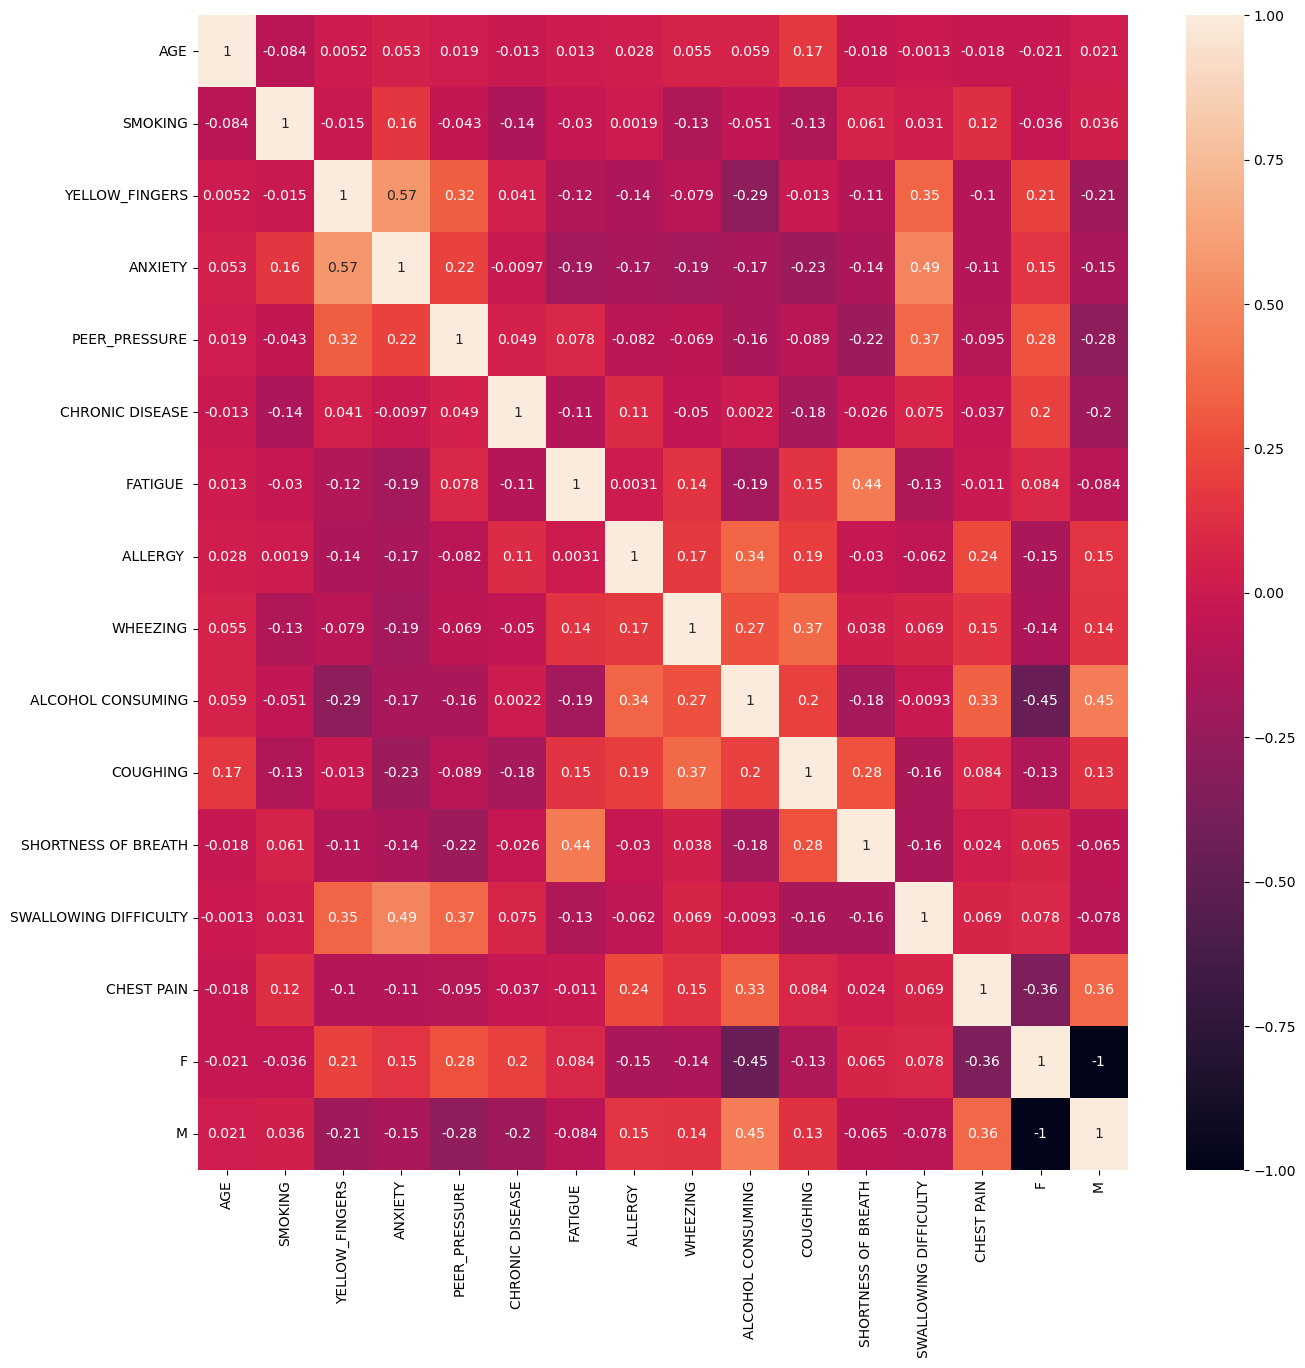

In [136]:
plt.figure(figsize= (15,15))
sns.heatmap(data.corr(), annot = True)
plt.savefig('C:\\Users\\Sriya\\Downloads\\heatmap_lungcancer.png')

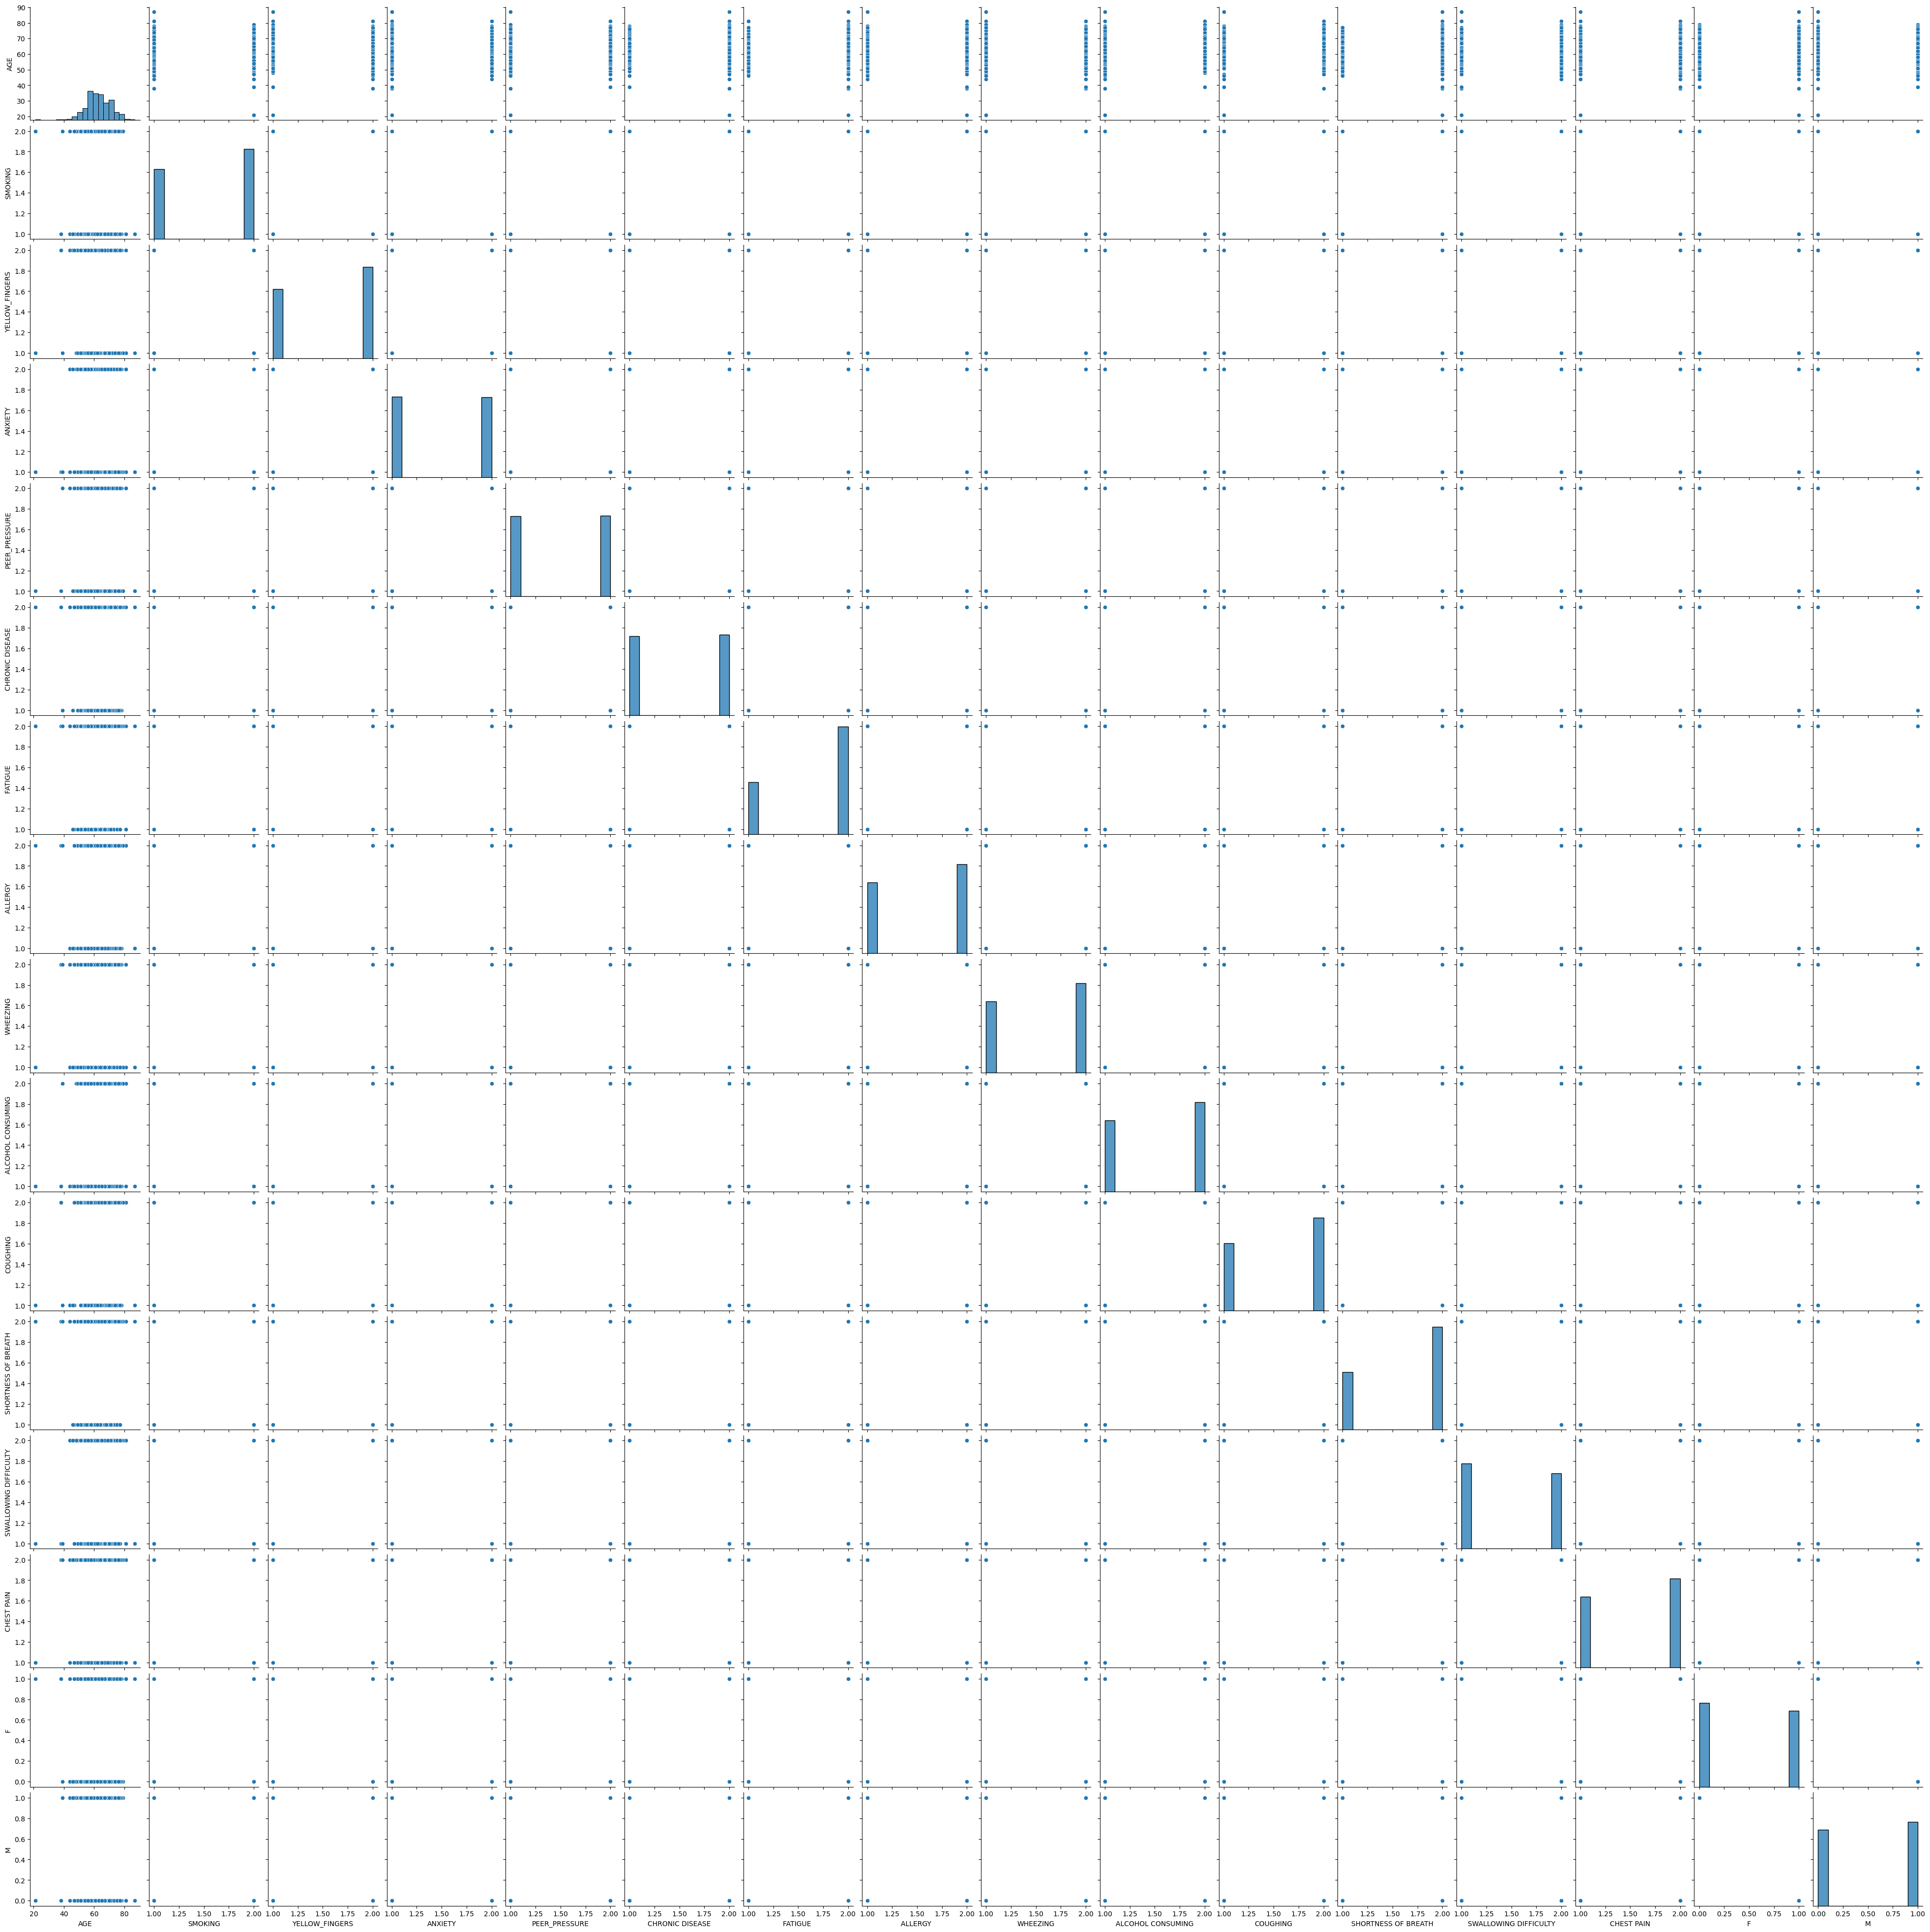

In [21]:
sns.pairplot(data)

In [111]:
x_data = data.drop('LUNG_CANCER' , axis=1)
x_data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,F,M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1,0


In [112]:
len(x_data)

309

In [113]:
y_data = data.LUNG_CANCER
y_data = y_data.replace(['YES','NO'],[1,0])

In [114]:
len(y_data)

309

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [116]:
x_data = pd.DataFrame(scaler.fit_transform(x_data))

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train , x_test , y_train , y_test =train_test_split(x_data , y_data)

In [119]:
len(x_train)

231

In [120]:
len(y_train)

231

In [121]:
len(x_test)

78

In [103]:
y_test.head()

288    1
281    0
198    1
29     0
144    1
Name: LUNG_CANCER, dtype: int64

In [122]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
243,-0.204116,-1.135292,-1.150351,1.003241,-1.003241,0.990338,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,-1.120480,-0.952579,0.952579
145,0.283867,0.880830,0.869300,1.003241,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,1.063501,-1.120480,1.049781,-1.049781
169,-0.814095,0.880830,0.869300,1.003241,0.996769,-1.009756,0.696833,0.892475,-1.120480,0.892475,0.852207,0.748736,-0.940291,0.892475,-0.952579,0.952579
9,-1.180082,0.880830,0.869300,1.003241,0.996769,0.990338,-1.435063,0.892475,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,-0.952579,0.952579
260,-0.448107,-1.135292,0.869300,1.003241,0.996769,0.990338,0.696833,-1.120480,0.892475,0.892475,-1.173424,-1.335584,-0.940291,-1.120480,1.049781,-1.049781


In [123]:
from xgboost import XGBClassifier
model = XGBClassifier(booster = 'gblinear')

In [124]:
model.fit(x_train,y_train )

XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [125]:
model.score(x_test , y_test)

0.9743589743589743

In [126]:
from sklearn.linear_model import LogisticRegression 
log = LogisticRegression(max_iter = 100 , penalty = 'l2')

In [127]:
log.fit(x_train , y_train)

LogisticRegression()

In [128]:
log.score(x_test , y_test)

0.9615384615384616